#데이터 처리

In [ ]:
import pandas as pd

# 데이터 불러오기(주차정보)
df = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/주차정보.csv", encoding = "cp949")

#년,월 합치기
df['일시'] = df['연도'].astype(str) + '-' + df['월'].astype(str).str.zfill(2)
parking = df.drop(['연도', '월'], axis=1)

parking.head()


,올림픽공원 입장객,올림픽공원 출입차량,일시
0,490902,90311.0,2013-01
1,382353,74186.0,2013-02
2,619925,108120.0,2013-03
3,593756,110139.0,2013-04
4,921642,138917.0,2013-05


In [ ]:
#공연정보
show = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/보정된_공연데이터.csv")
show = show.rename(columns={"년월": "일시"})
print(show.head())

        일시  공연건수
0  2013-01     8
1  2013-02     4
2  2013-03     9
3  2013-04    10
4  2013-05    10


In [ ]:
#기온정보
temp = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/기온(2013~2019).csv",encoding="cp949", skiprows=11)
temp= temp.drop(columns=['\t\t지점번호','지점명','최저기온일자','\t최고기온일자'])
temp.head()

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,2013-01,-3.4,0.3,11.5,-6.6,-16.4
1,2013-02,-1.2,2.8,13.9,-4.9,-15.8
2,2013-03,5.1,10.8,23.8,0.7,-4.4
3,2013-04,10.0,15.0,21.6,5.7,1.3
4,2013-05,18.2,23.6,31.8,13.7,7.9


In [ ]:
#강수량 정보
df = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/강수량(2013~2019).csv",encoding="cp949", skiprows=8)
#불필요 행 제거
rain = df.drop(columns=['\t지점번호','지점명','일최다강수량일자','1시간최다강수량(mm)','1시간최다강수량일자','Unnamed: 8'])


print(rain.head())

        일시  강수량(mm)  일최다강수량(mm)
0  2013-01     22.1        16.5
1  2013-02     74.1        46.5
2  2013-03     27.3        11.5
3  2013-04     71.7        21.0
4  2013-05    132.0        56.5


In [ ]:
#바람 정보
df = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/바람(2013~2019).csv",encoding="cp949", skiprows=14)

#불필요행 제거
wind= df.drop(columns=['\t\t지점번호','지점명','최대순간풍속풍향(deg)','\t'])

wind['일시'] = pd.to_datetime(wind['일시'], format='%b-%y').dt.strftime('%Y-%m')


print(wind.head())

        일시  평균풍속(m/s)  최대풍속(m/s)  최대풍속풍향(deg)  최대순간풍속(m/s)
0  2013-01        2.7        8.2        270.0         13.5
1  2013-02        2.9        8.4        270.0         14.8
2  2013-03        3.0        8.8        230.0         15.4
3  2013-04        3.4        9.9        230.0         17.7
4  2013-05        2.9        8.5        270.0         11.6


In [ ]:
#검색량 정보
df = pd.read_csv("/content/drive/MyDrive/machin learning/검색량.csv")
search = df.rename(columns={"년월": "일시"})
search = search.rename(columns={"합계": "검색량"})
search.head()


,일시,검색량
0,2013-01,62
1,2013-02,52
2,2013-03,25
3,2013-04,59
4,2013-05,70


In [ ]:
pip install holidays


In [ ]:
#공휴일 데이터 추가
import pandas as pd
import holidays

# 대한민국 공휴일 객체
kr_holidays = holidays.KR(years=range(2013, 2020))

df = pd.DataFrame({
    "date": list(kr_holidays.keys()),
    "name": list(kr_holidays.values())
})

# 🔥 date 컬럼을 datetime 타입으로 변환
df["date"] = pd.to_datetime(df["date"])

# yyyy-mm 생성
df["일시"] = df["date"].dt.strftime("%Y-%m")

# 월별 공휴일 수 집계
monthly_holidays = df.groupby("일시").size().reset_index(name="공휴일수")

# 2013~2019만 필터링
monthly_holidays = monthly_holidays[
    (monthly_holidays["일시"] >= "2013-01") &
    (monthly_holidays["일시"] <= "2019-12")
]

print(monthly_holidays)


         일시  공휴일수
0   2013-01     1
1   2013-02     3
2   2013-03     1
3   2013-05     2
4   2013-06     1
..      ...   ...
57  2019-06     1
58  2019-08     1
59  2019-09     3
60  2019-10     2
61  2019-12     1

[62 rows x 2 columns]


In [ ]:
merged_df = pd.merge(show, parking, on='일시', how='inner')
data = pd.merge(merged_df, rain, on='일시', how='inner')
data = pd.merge(data,wind, on='일시', how='inner')
dp_set = pd.merge(data,temp, on='일시', how='inner')
dp_set = pd.merge(dp_set,monthly_holidays, on='일시', how='inner')
dp_set = pd.merge(dp_set,search, on='일시', how='inner')
print(dp_set.head())

        일시  공연건수  올림픽공원 입장객  올림픽공원 출입차량  강수량(mm)  일최다강수량(mm)  평균풍속(m/s)  \
0  2013-01     8     490902     90311.0     22.1        16.5        2.7   
1  2013-02     4     382353     74186.0     74.1        46.5        2.9   
2  2013-03     9     619925    108120.0     27.3        11.5        3.0   
3  2013-05    10     921642    138917.0    132.0        56.5        2.9   
4  2013-06    12     702241    124253.0     28.3        12.0        2.2   

   최대풍속(m/s)  최대풍속풍향(deg)  최대순간풍속(m/s)  평균기온(℃)  평균최고기온(℃)  최고기온(℃)  \
0        8.2        270.0         13.5     -3.4        0.3     11.5   
1        8.4        270.0         14.8     -1.2        2.8     13.9   
2        8.8        230.0         15.4      5.1       10.8     23.8   
3        8.5        270.0         11.6     18.2       23.6     31.8   
4        6.2        250.0         10.4     24.4       29.2     32.6   

   평균최저기온(℃)  최저기온(℃)  공휴일수  검색량  
0       -6.6    -16.4     1   62  
1       -4.9    -15.8     3   52  
2        0.7     

In [ ]:
dp_set.to_csv("/content/최종.csv", index=False)

#상관계수

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕 or 나눔고딕 등 설치된 시스템 폰트로 대체 가능)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # Google Colab

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
import matplotlib.font_manager as fm
import matplotlib as mpl

font_path = "/content/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
mpl.rc('font', family='NanumGothic')


In [ ]:
# 숫자형 컬럼만 선택
num_df = dp_set.select_dtypes(include='number')

# 기준 변수
target = "올림픽공원 출입차량"

# 상관계수 계산
corr_series = num_df.corr()[target].sort_values(ascending=False)

print(corr_series)


올림픽공원 출입차량     1.000000
올림픽공원 입장객      0.895819
공연건수           0.451912
최고기온(℃)        0.417919
평균풍속(m/s)      0.406554
평균최고기온(℃)      0.395349
평균기온(℃)        0.380818
평균최저기온(℃)      0.361049
최대풍속(m/s)      0.360866
최저기온(℃)        0.360124
검색량            0.294464
공휴일수           0.111077
최대순간풍속(m/s)    0.100979
강수량(mm)       -0.009315
일최다강수량(mm)    -0.047722
최대풍속풍향(deg)   -0.223367
Name: 올림픽공원 출입차량, dtype: float64


In [ ]:
corr = dp_set.drop(columns=['일시'])

# 각각의 주차장소와 다른 변수들 간의 상관계수 추출
olympic_corr = corr.corr()['올림픽공원 출입차량'].drop(['올림픽공원 출입차량'])

# 결과 보기
print("\n✅ 올림픽공원 주차 차량 상관계수:")
print(olympic_corr.sort_values(ascending=False))



✅ 올림픽공원 주차 차량 상관계수:
올림픽공원 입장객      0.895819
공연건수           0.451912
최고기온(℃)        0.417919
평균풍속(m/s)      0.406554
평균최고기온(℃)      0.395349
평균기온(℃)        0.380818
평균최저기온(℃)      0.361049
최대풍속(m/s)      0.360866
최저기온(℃)        0.360124
검색량            0.294464
공휴일수           0.111077
최대순간풍속(m/s)    0.100979
강수량(mm)       -0.009315
일최다강수량(mm)    -0.047722
최대풍속풍향(deg)   -0.223367
Name: 올림픽공원 출입차량, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 (파일 경로는 필요에 맞게 수정)
df = dp_set

# 숫자형 컬럼만 선택
num_df = df.select_dtypes(include=[np.number]).copy()

# 타깃 변수명 (데이터의 정확한 컬럼명에 맞춰 수정하세요)
target1 = "올림픽공원 입장객"
target2 = "올림픽공원 출입차량"

# 1) 입장객 기준 상관계수
corr1 = num_df.corr()[target1].drop(labels=[target1]).sort_values(ascending=False)
print("=== 입장객 기준 상관계수(상위) ===")
print(corr1.head(10))


# 2) 출입차량 기준 상관계수
corr2 = num_df.corr()[target2].drop(labels=[target2]).sort_values(ascending=False)
print("=== 출입차량 기준 상관계수(상위) ===")
print(corr2.head(10))


=== 입장객 기준 상관계수(상위) ===
올림픽공원 출입차량    0.895819
최고기온(℃)       0.483383
평균최고기온(℃)     0.445086
평균기온(℃)       0.421589
검색량           0.406164
공연건수          0.401840
평균최저기온(℃)     0.391854
최저기온(℃)       0.375844
최대풍속(m/s)     0.284682
평균풍속(m/s)     0.236499
Name: 올림픽공원 입장객, dtype: float64
=== 출입차량 기준 상관계수(상위) ===
올림픽공원 입장객    0.895819
공연건수         0.451912
최고기온(℃)      0.417919
평균풍속(m/s)    0.406554
평균최고기온(℃)    0.395349
평균기온(℃)      0.380818
평균최저기온(℃)    0.361049
최대풍속(m/s)    0.360866
최저기온(℃)      0.360124
검색량          0.294464
Name: 올림픽공원 출입차량, dtype: float64


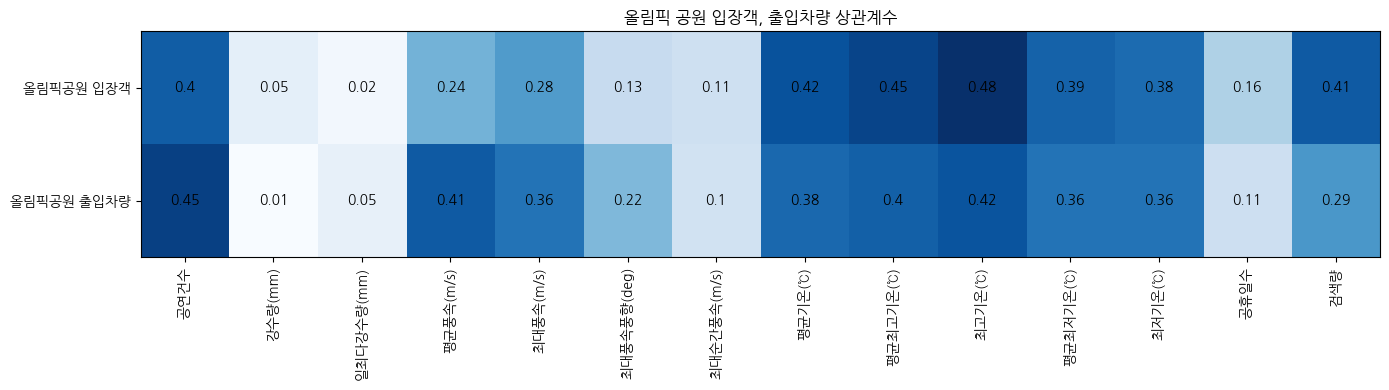

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 세로(행)으로 사용할 변수
row_vars = ["올림픽공원 입장객", "올림픽공원 출입차량"]

# 숫자형 전체 중에서 위 2개 제외
num_df = dp_set.select_dtypes(include='number')
col_vars = [c for c in num_df.columns if c not in row_vars]

# 2 x N 행렬 생성
heat = np.zeros((len(row_vars), len(col_vars)))

# 절대 상관계수 직접 계산
for i, r in enumerate(row_vars):
    for j, c in enumerate(col_vars):
        heat[i, j] = np.abs(num_df[r].corr(num_df[c]))

# 하늘색 계열 컬러맵 (Blues 사용)
plt.figure(figsize=(14, 4))
plt.imshow(heat, cmap='Blues', aspect='auto')


plt.yticks(ticks=np.arange(len(row_vars)), labels=row_vars)
plt.xticks(ticks=np.arange(len(col_vars)), labels=col_vars, rotation=90)

# 정사각형 안 값 표시
for i in range(len(row_vars)):
    for j in range(len(col_vars)):
        plt.text(j, i, round(heat[i, j], 2), ha='center', va='center')

plt.title("올림픽 공원 입장객, 출입차량 상관계수")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ----------------------------------------
# 1. 데이터 로드
# ----------------------------------------
df = dp_set   # 너의 최종 병합한 파일명

# ----------------------------------------
# 2. Feature / Target 설정
# ----------------------------------------

features = [
    "공연건수",
    "최고기온(℃)",
    "평균풍속(m/s)",
    "평균최고기온(℃)",
    "평균기온(℃)",
    "평균최저기온(℃)",
    "최대풍속(m/s)",
    "최저기온(℃)",
    "공휴일수"
]

target = "올림픽공원 입장객"

X = df[features]
y = df[target]

# ----------------------------------------
# 3. Train/Test Split
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------
# 4. 두 모델 비교
# ----------------------------------------

models = {
    "RandomForest": RandomForestRegressor(n_estimators=500, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = mse ** 0.5    # ← 여기 수정!
    r2 = r2_score(y_test, pred)

    results[name] = {"RMSE": rmse, "R2": r2}

    print(f"\n===== {name} =====")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2  : {r2:.3f}")

# ----------------------------------------
# 5. RandomForest 변수 중요도 출력
# ----------------------------------------

rf = models["RandomForest"]
importances = pd.Series(rf.feature_importances_, index=features)
print("\n=== Feature Importance (RF) ===")
print(importances.sort_values(ascending=False))



===== RandomForest =====
RMSE: 97449.85
R2  : 0.495

===== XGBoost =====
RMSE: 88642.50
R2  : 0.582

=== Feature Importance (RF) ===
최고기온(℃)      0.319483
공연건수         0.173261
최저기온(℃)      0.144134
최대풍속(m/s)    0.095991
평균최저기온(℃)    0.068498
평균기온(℃)      0.056105
공휴일수         0.054620
평균풍속(m/s)    0.050635
평균최고기온(℃)    0.037273
dtype: float64


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


df = dp_set   # 너의 최종 병합한 파일명


features = [
    "공연건수",
    "최고기온(℃)",
    "평균풍속(m/s)",
    "평균최고기온(℃)",
    "평균기온(℃)",
    "평균최저기온(℃)",
    "최대풍속(m/s)",
    "최저기온(℃)",
    "공휴일수"
]

target = "올림픽공원 출입차량"

X = df[features]
y = df[target]

# ----------------------------------------
# 3. Train/Test Split
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------
# 4. 두 모델 비교
# ----------------------------------------

models = {
    "RandomForest": RandomForestRegressor(n_estimators=500, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mse = mean_squared_error(y_test, pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, pred)

    results[name] = {"RMSE": rmse, "R2": r2}

    print(f"\n===== {name} =====")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2  : {r2:.3f}")

# ----------------------------------------
# 5. RandomForest 변수 중요도 출력
# ----------------------------------------

rf = models["RandomForest"]
importances = pd.Series(rf.feature_importances_, index=features)
print("\n=== Feature Importance (RF) ===")
print(importances.sort_values(ascending=False))



===== RandomForest =====
RMSE: 18798.91
R2  : 0.363

===== XGBoost =====
RMSE: 17728.81
R2  : 0.433

=== Feature Importance (RF) ===
최고기온(℃)      0.255326
공연건수         0.241431
최대풍속(m/s)    0.151410
최저기온(℃)      0.081713
평균풍속(m/s)    0.076037
평균최저기온(℃)    0.064516
공휴일수         0.050442
평균기온(℃)      0.043011
평균최고기온(℃)    0.036114
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import lightgbm as lgb

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/machin learning/올림픽 공원 데이터/최종.csv")

# 타겟 및 제외 컬럼 설정
target = "올림픽공원 출입차량"
remove_cols = ["일시", "올림픽공원 입장객", target]

X = df.drop(columns=remove_cols)
y = df[target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LGBM 모델 생성 및 학습
model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)
model.fit(X_train, y_train)

# 예측
preds = model.predict(X_test)

# 평가 지표
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MAE:", mae)
print("R2:", r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 49, number of used features: 14
[LightGBM] [Info] Start training from score 91049.938776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "random_state": 42,

        "num_leaves": trial.suggest_int("num_leaves", 20, 80),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 40),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []

    for train_idx, valid_idx in cv.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

        model = lgb.LGBMRegressor(**params)
        model.fit(X_tr, y_tr)

        preds = model.predict(X_val)
        mse = mean_squared_error(y_val, preds)
        rmse_list.append(np.sqrt(mse))

    return np.mean(rmse_list)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 17.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
import lightgbm as lgb

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# ================================
# 1) 데이터 로드 & 전처리
# ================================
df = pd.read_csv("/content/최종.csv")

target = "올림픽공원 출입차량"
drop_cols = ["일시", "올림픽공원 입장객", target]

X = df.drop(columns=drop_cols)
y = df[target]


# ================================
# 2) 5-Fold 교차검증 기반 Optuna 튜닝
# ================================
def objective(trial):

    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "random_state": 42,

        # ---- Search Space (데이터 적을 때 최적범위) ----
        "num_leaves": trial.suggest_int("num_leaves", 20, 80),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.02, 0.15),
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 40),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []

    for train_idx, valid_idx in cv.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

        model = lgb.LGBMRegressor(**params)
        model.fit(X_tr, y_tr)

        preds = model.predict(X_val)
        mse = mean_squared_error(y_val, preds)
        rmse = np.sqrt(mse)
        rmse_list.append(rmse)

    return np.mean(rmse_list)


# ---- Optuna 실행 ----
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("\n===== Optuna 결과 =====")
print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)


# ================================
# 3) 최적 파라미터로 최종 모델 학습
# ================================
best_params = study.best_params
best_params.update({
    "objective": "regression",
    "metric": "rmse",
    "random_state": 42,
    "verbosity": -1
})

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# ================================
# 4) 최종 예측 & 성능 평가
# ================================
preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\n===== 최종 테스트셋 성능 =====")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


[I 2025-12-07 14:10:16,549] A new study created in memory with name: no-name-ec1dddd7-1813-49f7-92e7-07e31a64adb5
[I 2025-12-07 14:10:16,699] Trial 0 finished with value: 20263.00192342348 and parameters: {'num_leaves': 42, 'max_depth': 5, 'learning_rate': 0.02533031890892327, 'n_estimators': 553, 'min_child_samples': 23, 'subsample': 0.7432488544112013, 'colsample_bytree': 0.7311261004402223}. Best is trial 0 with value: 20263.00192342348.
[I 2025-12-07 14:10:16,737] Trial 1 finished with value: 27053.222014949446 and parameters: {'num_leaves': 67, 'max_depth': 4, 'learning_rate': 0.09017189514345306, 'n_estimators': 354, 'min_child_samples': 36, 'subsample': 0.9012172371526682, 'colsample_bytree': 0.9363795543917256}. Best is trial 0 with value: 20263.00192342348.
[I 2025-12-07 14:10:16,786] Trial 2 finished with value: 27053.222014949446 and parameters: {'num_leaves': 74, 'max_depth': 4, 'learning_rate': 0.11032227411214306, 'n_estimators': 757, 'min_child_samples': 29, 'subsample':


===== Optuna 결과 =====
Best RMSE: 18719.00944555311
Best Params: {'num_leaves': 20, 'max_depth': 10, 'learning_rate': 0.13913800344281785, 'n_estimators': 700, 'min_child_samples': 10, 'subsample': 0.792060753427514, 'colsample_bytree': 0.8124632564610123}

===== 최종 테스트셋 성능 =====
RMSE: 19240.498288826537
MAE: 14277.451294202205
R²: 0.3325409468934428


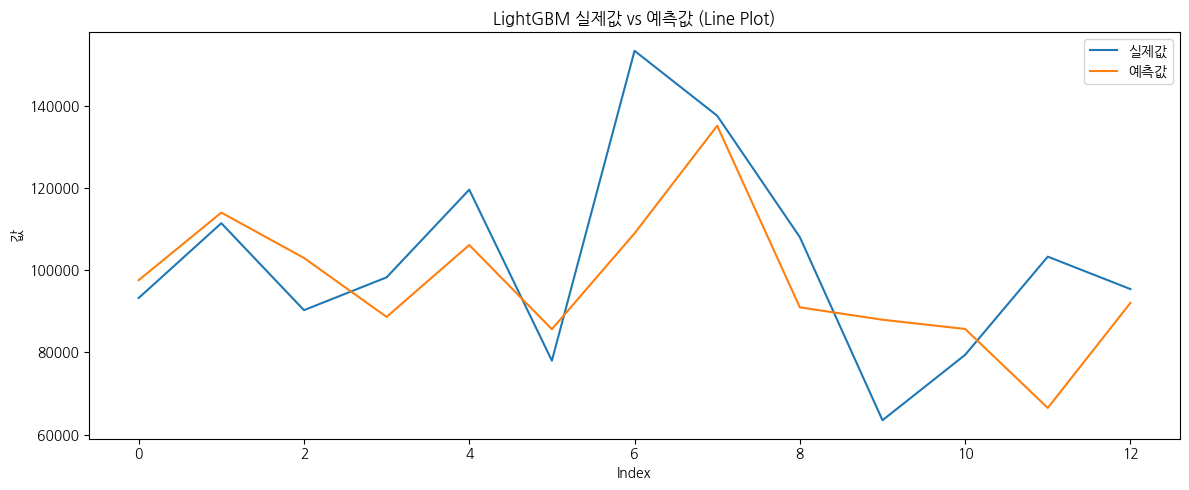

In [ ]:
import matplotlib.pyplot as plt

# 시계열 형태로 보기 위해 인덱스 정렬
y_test_sorted = y_test.reset_index(drop=True)
preds_sorted = pd.Series(preds).reset_index(drop=True)

plt.figure(figsize=(12, 5))
plt.plot(y_test_sorted, label="실제값")
plt.plot(preds_sorted, label="예측값")
plt.xlabel("Index")
plt.ylabel("값")
plt.title("LightGBM 실제값 vs 예측값 (Line Plot)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb

# ----------------------------
# 1. 데이터 로드
# ----------------------------
df = pd.read_csv("/content/최종.csv")

# 날짜 처리
df['일시'] = pd.to_datetime(df['일시'])

# ----------------------------
# 2. 날짜 기반 특징 생성
# ----------------------------
df['year'] = df['일시'].dt.year
df['month'] = df['일시'].dt.month
df['day'] = df['일시'].dt.day
df['dayofweek'] = df['일시'].dt.dayofweek    # 월=0 ~ 일=6
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

# 계절 (봄=1, 여름=2, 가을=3, 겨울=4)
def season(x):
    if x in [3,4,5]: return 1
    if x in [6,7,8]: return 2
    if x in [9,10,11]: return 3
    return 4
df['season'] = df['month'].apply(season)

# ----------------------------
# 3. Lag & Rolling Feature
# ----------------------------
target = "올림픽공원 출입차량"

df['lag1'] = df[target].shift(1)
df['lag7'] = df[target].shift(7)
df['rolling3'] = df[target].shift(1).rolling(window=3).mean()
df['rolling7'] = df[target].shift(1).rolling(window=7).mean()

# 초기 NaN 제거
df = df.dropna().reset_index(drop=True)

# ----------------------------
# 4. 사용하지 않을 컬럼 제거
# ----------------------------
drop_cols = ["일시", "올림픽공원 입장객"]  # 방문객수 제외
df_model = df.drop(columns=drop_cols)

# ----------------------------
# 5. Train/Test Split
#    (시계열 데이터는 셔플하면 안됨)
# ----------------------------
train_size = int(len(df_model) * 0.8)

train = df_model.iloc[:train_size]
test = df_model.iloc[train_size:]

X_train = train.drop(columns=[target])
y_train = train[target]

X_test = test.drop(columns=[target])
y_test = test[target]

# ----------------------------
# 6. LGBM 모델 학습
# ----------------------------
model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=100,
    random_state=42
)

model.fit(X_train, y_train)

# ----------------------------
# 7. 예측 및 평가
# ----------------------------
preds = model.predict(X_test)

# squared=False 제거 → 직접 sqrt 적용
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("===== 모델 성능 =====")
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

===== 모델 성능 =====
RMSE: 21714.576884021324
MAE: 16781.374916967234
R²: 0.047421787747148114


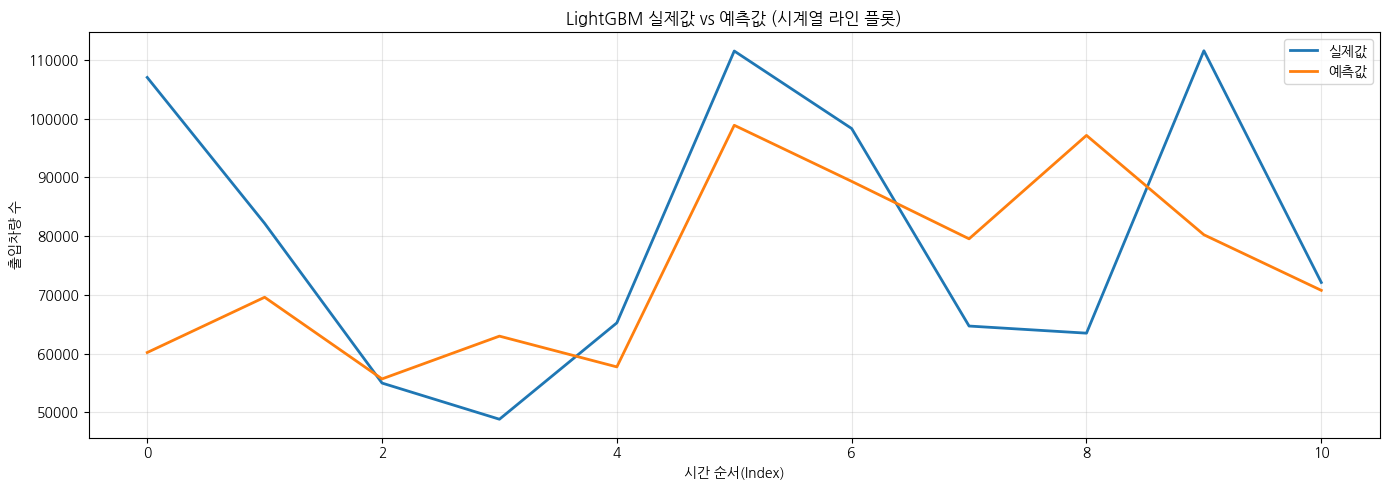

In [ ]:
import matplotlib.pyplot as plt

# 인덱스 초기화 (시계열 순서 유지)
y_test_sorted = y_test.reset_index(drop=True)
preds_sorted = pd.Series(preds).reset_index(drop=True)

plt.figure(figsize=(14, 5))

plt.plot(y_test_sorted, label="실제값", linewidth=2)
plt.plot(preds_sorted, label="예측값", linewidth=2)

plt.xlabel("시간 순서(Index)")
plt.ylabel("출입차량 수")
plt.title("LightGBM 실제값 vs 예측값 (시계열 라인 플롯)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
